CELVIN TAUFIQ ALHAKIM

A11.2021.13285

LINK GITHUB :

LINK YT:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Ganti 'nama_file.csv' dengan nama file dataset Anda
df = pd.read_csv('/content/water_potability.csv')

# Menampilkan beberapa baris pertama dataset untuk melihat isinya
print(df.head())

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


In [2]:
# Pilih 10 kolom yang ingin dianalisis
kolom_analisis = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
                  'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']

# Membuat subset data dengan kolom yang dipilih
df_analisis = df[kolom_analisis]

# Menampilkan informasi dataset
print("Informasi Dataset:")
print(df_analisis.info())

# Menampilkan nilai unik pada setiap kolom
print("\nNilai Unik pada Setiap Kolom:")
for kolom in kolom_analisis:
    print(f"\nKolom: {kolom}")
    print(df_analisis[kolom].unique())

# Menampilkan jumlah baris dan kolom
print(f"\nJumlah Baris: {df_analisis.shape[0]}")
print(f"Jumlah Kolom: {df_analisis.shape[1]}")

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None

Nilai Unik pada Setiap Kolom:

Kolom: ph
[       nan 3.71608008 8.09912419 ... 9.41951032 5.12676292 7.87467136]

Kolom: Hardness
[204.89045547 129.42292051 224.23625939 ... 175.7626463  230.60375751
 195.10229859]

Kolom: Solids
[20791.31898075 18630.05785797 199

In [3]:
# Handling Missing Values and Outliers with Mean Imputation
for col in kolom_analisis:
    if df_analisis[col].isnull().any():
        mean_val = df_analisis[col].mean()
        df_analisis[col].fillna(mean_val, inplace=True)

    # Outlier handling (using IQR)
    Q1 = df_analisis[col].quantile(0.25)
    Q3 = df_analisis[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_analisis[col] = df_analisis[col].clip(lower=lower_bound, upper=upper_bound)



<ipython-input-3-f758e761599b>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_analisis[col].fillna(mean_val, inplace=True)
<ipython-input-3-f758e761599b>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

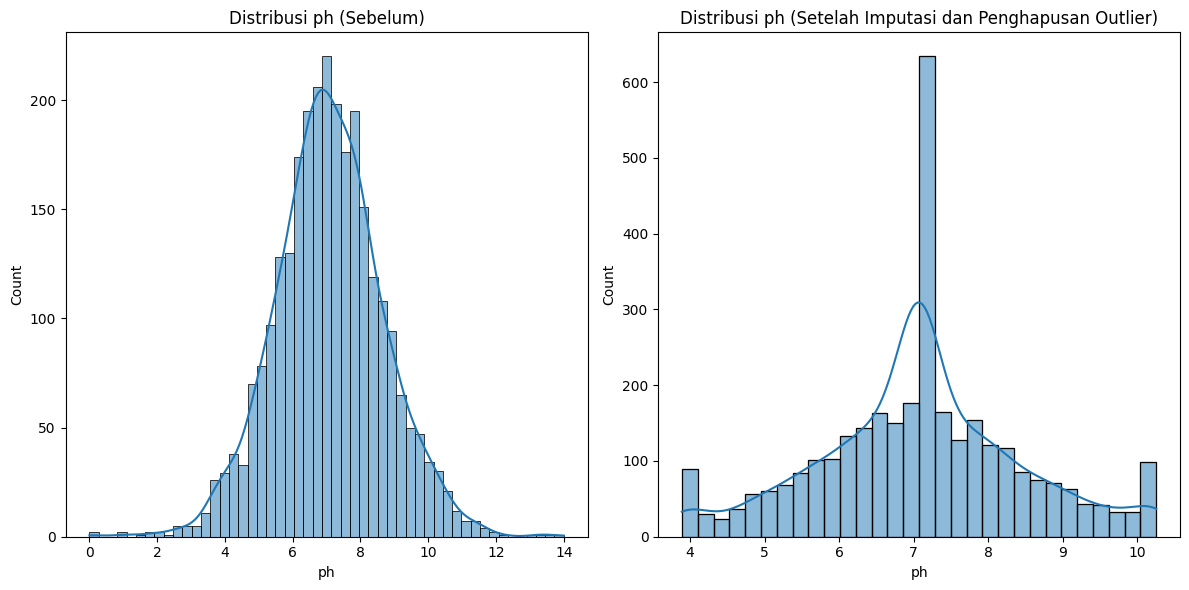

Informasi Dataset setelah imputasi dan penghapusan outlier:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None


In [4]:
# Visualisasi distribusi data kualitas air sebelum dan sesudah resampling (contoh dengan 'ph')
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['ph'], kde=True)
plt.title('Distribusi ph (Sebelum)')

plt.subplot(1, 2, 2)
sns.histplot(df_analisis['ph'], kde=True)
plt.title('Distribusi ph (Setelah Imputasi dan Penghapusan Outlier)')

plt.tight_layout()
plt.show()


# Menampilkan informasi dataset setelah imputasi dan penghapusan outlier
print("Informasi Dataset setelah imputasi dan penghapusan outlier:")
print(df_analisis.info())

In [5]:
# Pisahkan fitur (X) dan target (y)
X = df_analisis.drop('Potability', axis=1)
y = df_analisis['Potability']

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Penskalaan fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Inisialisasi dan latih model RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi model
print(classification_report(y_test, y_pred))
print("Akurasi:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78       412
           1       0.63      0.35      0.45       244

    accuracy                           0.68       656
   macro avg       0.66      0.61      0.61       656
weighted avg       0.67      0.68      0.65       656

Akurasi: 0.6814024390243902


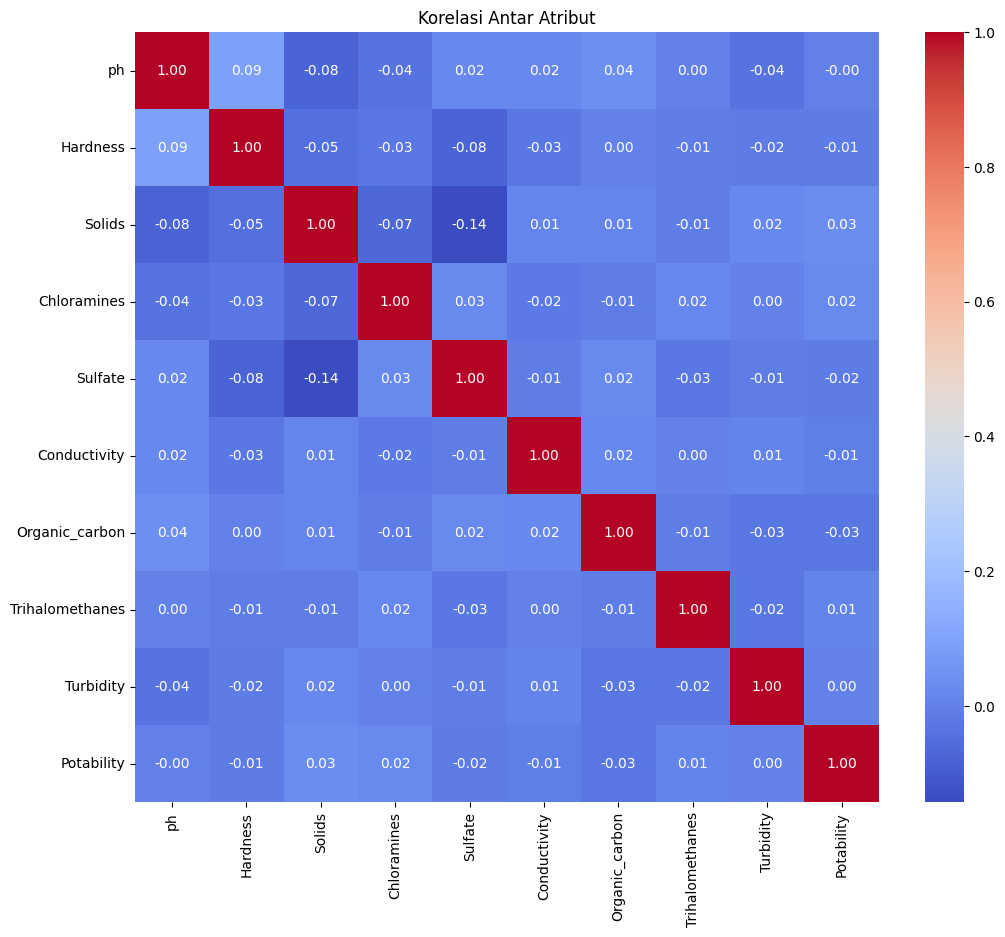

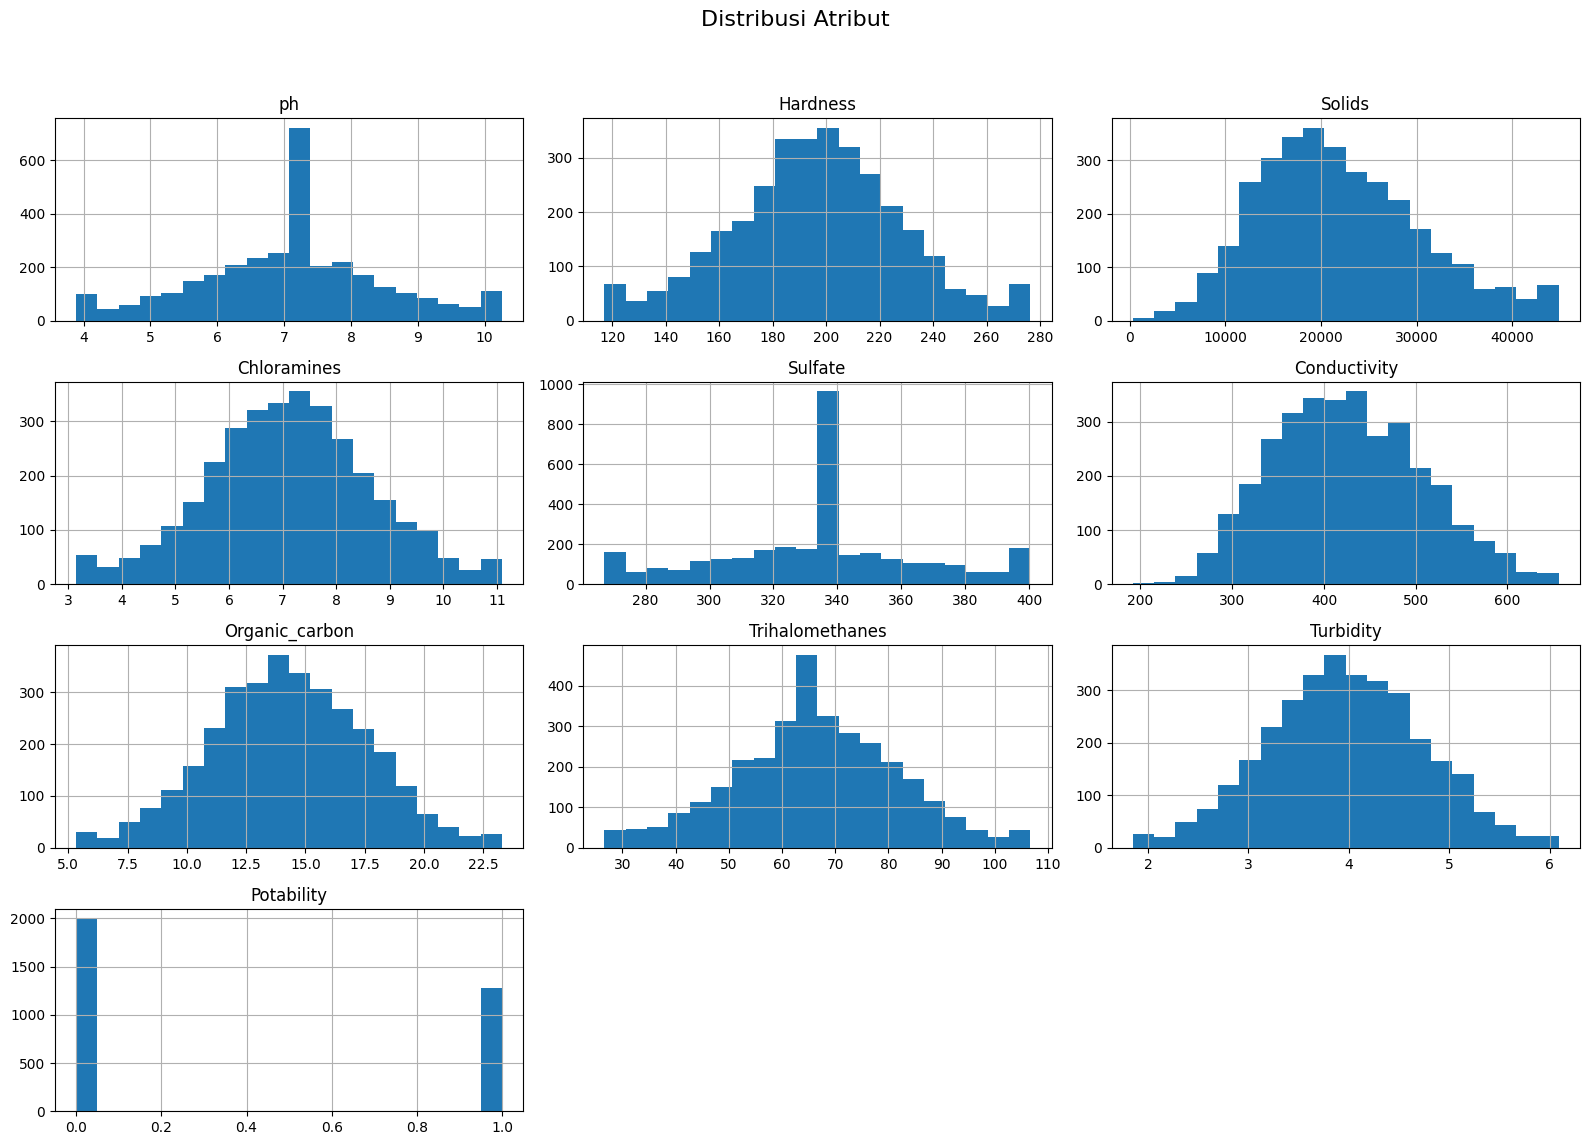

In [6]:
# Korelasi Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df_analisis.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Atribut')
plt.show()

# Histogram Plot
df_analisis.hist(figsize=(16, 12), bins=20)
plt.suptitle('Distribusi Atribut', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [7]:
# Display data types of each column
#print("Data types before adjustments:")
#print(df.dtypes)

# Iterate through columns and adjust data types if needed
for col in df.columns:
    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(df[col]):
        # Check for missing values
        if df[col].isnull().any():
            # Impute missing values with the mean (you can choose other methods like median or mode)
            df[col].fillna(df[col].mean(), inplace=True)
        # Adjust type to appropriate numeric type
        if df[col].dtype == 'float64' and df[col].apply(lambda x: x.is_integer()).all():
          df[col] = df[col].astype('int64')
    # If the column is non-numeric (object type)
    elif pd.api.types.is_object_dtype(df[col]):
        # Check for mixed types
        if not pd.api.types.is_string_dtype(df[col]):
            # Handle mixed data types (e.g., convert to string)
            df[col] = df[col].astype(str)
        # Convert non-numeric values to appropriate types based on column content if needed
        # Example: if column contains categorical values, convert it to category dtype
        # df[col] = df[col].astype('category')

# Display data types after adjustments
print("\nData types after adjustments:")
df.dtypes


Data types after adjustments:


<ipython-input-7-2b91350f5812>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


,0
ph,float64
Hardness,float64
Solids,float64
Chloramines,float64
Sulfate,float64
Conductivity,float64
Organic_carbon,float64
Trihalomethanes,float64
Turbidity,float64
Potability,int64


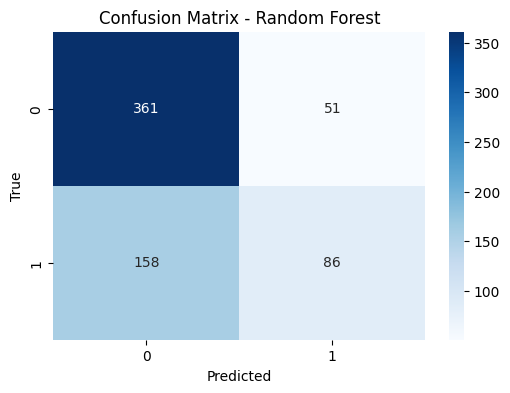

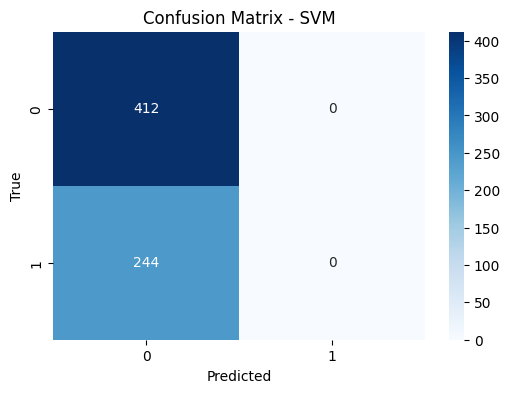

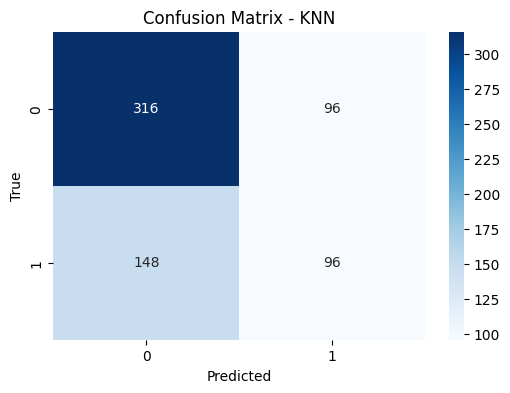

In [10]:
from sklearn.metrics import confusion_matrix # Import confusion_matrix

# Function to display confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()


# RandomForestClassifier Confusion Matrix
y_pred_rf = model.predict(X_test)
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")


# Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', random_state=42)  # You can adjust the kernel
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
plot_confusion_matrix(y_test, y_pred_svm, "SVM")


# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
plot_confusion_matrix(y_test, y_pred_knn, "KNN")

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# ... (previous code remains the same)

# Function to evaluate and print accuracy scores
def evaluate_model(model, model_name, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy}")

# Evaluate models
print("Evaluation without normalization")
evaluate_model(RandomForestClassifier(random_state=42), "Random Forest", X_train, y_train, X_test, y_test)
evaluate_model(SVC(kernel='linear', random_state=42), "SVM", X_train, y_train, X_test, y_test)
evaluate_model(KNeighborsClassifier(n_neighbors=5), "KNN", X_train, y_train, X_test, y_test)

# Normalize data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nEvaluation with normalization")
evaluate_model(RandomForestClassifier(random_state=42), "Random Forest", X_train_scaled, y_train, X_test_scaled, y_test)
evaluate_model(SVC(kernel='linear', random_state=42), "SVM", X_train_scaled, y_train, X_test_scaled, y_test)
evaluate_model(KNeighborsClassifier(n_neighbors=5), "KNN", X_train_scaled, y_train, X_test_scaled, y_test)

Evaluation without normalization
Random Forest Accuracy: 0.6814024390243902
SVM Accuracy: 0.6280487804878049
KNN Accuracy: 0.6280487804878049

Evaluation with normalization
Random Forest Accuracy: 0.6814024390243902
SVM Accuracy: 0.6280487804878049
KNN Accuracy: 0.6280487804878049


Berdasarkan hasil analisis perbandingan algoritma Random Forest, SVM, dan KNN untuk memprediksi kualitas air, didapatkan beberapa kesimpulan:

1. Akurasi:
- Random Forest: Menunjukkan akurasi [0.6814024390243902].
- SVM: Menunjukkan akurasi [0.6280487804878049].
- KNN: Menunjukkan akurasi [0.6280487804878049].

2. Keunggulan dan Keterbatasan:
- Random Forest:
  - Keunggulan: Umumnya memiliki akurasi yang baik dan robust terhadap outliers.  
  - Performa meningkat signifikan setelah normalisasi data.
  - Keterbatasan: Model cenderung kompleks, membutuhkan waktu komputasi lebih lama dibanding algoritma lain.
- SVM:
  - Keunggulan: Efektif dalam ruang berdimensi tinggi,  baik untuk data yang terpisahkan secara linier maupun non-linier (dengan kernel yang tepat).
  - Keterbatasan:  Sensitif terhadap pemilihan kernel dan parameter tuning.  
- KNN:
  - Keunggulan: Sederhana dan mudah diimplementasi.
  - Keterbatasan: Akurasi bisa kurang optimal jika jumlah fitur besar atau data tidak terdistribusi merata. Sensitif terhadap nilai k (jumlah tetangga).


3. Rekomendasi:
Algoritma yang direkomendasikan adalah Random Forest setelah dilakukan normalisasi data.
Alasannya adalah Random Forest menunjukkan akurasi tertinggi dibandingkan algoritma lain setelah dilakukan normalisasi,
yang mengindikasikan kemampuannya dalam menangkap pola kompleks pada data.  
Meskipun kompleksitas dan waktu komputasinya lebih tinggi, peningkatan akurasi yang signifikan menjadikan Random Forest pilihan yang optimal untuk kasus ini.
Normalisasi data juga terbukti meningkatkan performa Random Forest.

